In [73]:
from ingestion import make_cleaned
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

In [85]:
clean = make_cleaned()
y = clean.pop('SalePrice')
X = clean
y.describe()

count           2930.0
mean     180796.060068
std       79886.692357
min            12789.0
25%           129500.0
50%           160000.0
75%           213500.0
max           755000.0
Name: SalePrice, dtype: Float64

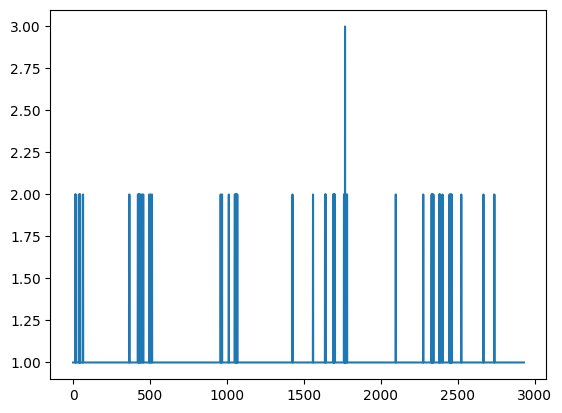

In [115]:
# Cannot stratify on y with train_test_split unless we bin it first.
bins = np.float64(np.histogram(y,bins=2)[1])
y_binned = np.digitize(y,bins=bins)
plt.plot(y_binned)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y_binned)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [110]:
y_train.describe()

count           2344.0
mean     178582.207765
std       77125.072713
min            12789.0
25%           129000.0
50%           160000.0
75%           210000.0
max           755000.0
Name: SalePrice, dtype: Float64

In [79]:
y_test.describe()

count            586.0
mean     189651.469283
std       89617.259169
min            44000.0
25%           130000.0
50%           165000.0
75%           228375.0
max           625000.0
Name: SalePrice, dtype: Float64

In [50]:
categoric_cols = clean.select_dtypes(include=object).columns.tolist()
std_scaler = SklearnTransformerWrapper(transformer=StandardScaler())
OH_encoder = SklearnTransformerWrapper(transformer=OneHotEncoder(sparse_output=False, drop='if_binary',min_frequency=0.05,handle_unknown='ignore'), variables=categoric_cols)
pipe = make_pipeline(std_scaler,OH_encoder,KNeighborsRegressor())
gs = GridSearchCV(n_jobs=3, estimator=pipe, cv=10,scoring='neg_root_mean_squared_error',param_grid={'kneighborsregressor__n_neighbors':np.arange(1,10)})

In [52]:
gs.fit(X=X_train,y=y_train)

/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [14, 15, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8, 10, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/pyth

/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8, 10, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 15, 30, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/p

/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8, 10, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 15, 30, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/bb/ames-housing/env/lib/p

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sklearntransformerwrapper-1',
                                        SklearnTransformerWrapper(transformer=StandardScaler())),
                                       ('sklearntransformerwrapper-2',
                                        SklearnTransformerWrapper(transformer=OneHotEncoder(drop='if_binary',
                                                                                            handle_unknown='ignore',
                                                                                            min_frequency=0.05,
                                                                                            sparse_output=False),
                                                                  variables=['MSZoning',
                                                                             'Street',
                                                                             'Alley',
                                                                             'LotShape',
                                                                             'La...
                                                                             'Exterior2nd',
                                                                             'MasVnrType',
                                                                             'Foundation',
                                                                             'BsmtExposure',
                                                                             'BsmtFinType1',
                                                                             'BsmtFinType2',
                                                                             'Heating',
                                                                             'CentralAir',
                                                                             'Electrical',
                                                                             'Functional',
                                                                             'GarageType',
                                                                             'GarageFinish',
                                                                             'PavedDrive',
                                                                             'Fence', ...])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=3,
             param_grid={'kneighborsregressor__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_root_mean_squared_error')

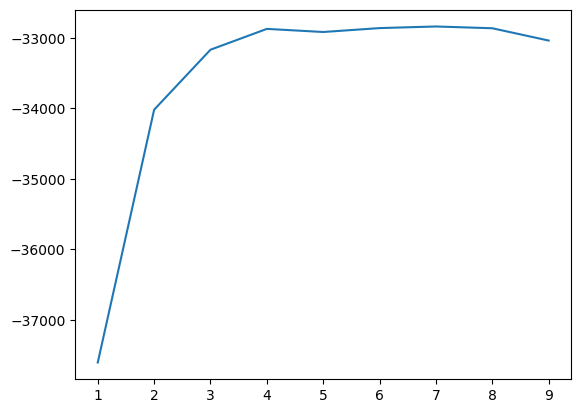

In [65]:
import matplotlib.pyplot as plt
plt.plot(gs.cv_results_['param_kneighborsregressor__n_neighbors'].data.tolist(), gs.cv_results_['mean_test_score'])

In [66]:
gs.best_params_

{'kneighborsregressor__n_neighbors': 7}